In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



In [ ]:
train_new = pd.read_csv(r"C:\Users\Pham Thai Son\Documents\Subjects\NLP\data for news classification\vectorized_train.csv")

X_train = train_new.drop(columns=['label'])
y_train = train_new['label']

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_encoded)

y_resampled = encoder.inverse_transform(y_resampled)

train_balanced = pd.DataFrame(X_resampled, columns=X_train.columns)
train_balanced['label'] = y_resampled

print("Train sau khi SMOTE:")
print(train_balanced['label'].value_counts())

train_balanced.to_csv("train_balanced_new.csv", index=False)

C:\Users\Pham Thai Son\AppData\Local\Temp\ipykernel_20764\1388717822.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_balanced['label'] = y_resampled


Train sau khi SMOTE:
label
The gioi            5298
Suc khoe            5298
Vi tinh             5298
Phap luat           5298
Doi song            5298
Chinh tri Xa hoi    5298
The thao            5298
Van hoa             5298
Khoa hoc            5298
Kinh doanh          5298
Name: count, dtype: int64


In [5]:
train_balanced.info

<bound method DataFrame.info of             hai        đi      đội        mỹ  nguyễn     đồng       nam  \
0      0.000000  0.013096  0.00000  0.000000     0.0  0.00000  0.000000   
1      0.075031  0.000000  0.00000  0.000000     0.0  0.00000  0.000000   
2      0.051316  0.070741  0.02602  0.117143     0.0  0.00000  0.000000   
3      0.000000  0.000000  0.00000  0.028265     0.0  0.00000  0.026931   
4      0.000000  0.000000  0.00000  0.264486     0.0  0.00000  0.000000   
...         ...       ...      ...       ...     ...      ...       ...   
52975  0.000000  0.000000  0.00000  0.093686     0.0  0.00000  0.000000   
52976  0.018521  0.000000  0.00000  0.000000     0.0  0.00000  0.000000   
52977  0.032099  0.000000  0.00000  0.000000     0.0  0.00000  0.000000   
52978  0.000000  0.000000  0.00000  0.000000     0.0  0.00982  0.057596   
52979  0.004496  0.000000  0.00000  0.000000     0.0  0.00000  0.000000   

           tiền   công_ty  trận  ...  tán  động_lực  nhi  phì  tạt 

### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from pyvi import ViTokenizer
from collections import Counter
from nltk.util import ngrams



[nltk_data] Downloading package punkt to C:\Users\Pham Thai
[nltk_data]     Son\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pham Thai
[nltk_data]     Son\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Pham Thai
[nltk_data]     Son\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df  = pd.read_csv(r"C:\Users\Pham Thai Son\Documents\Subjects\NLP\data for news classification\train.csv")

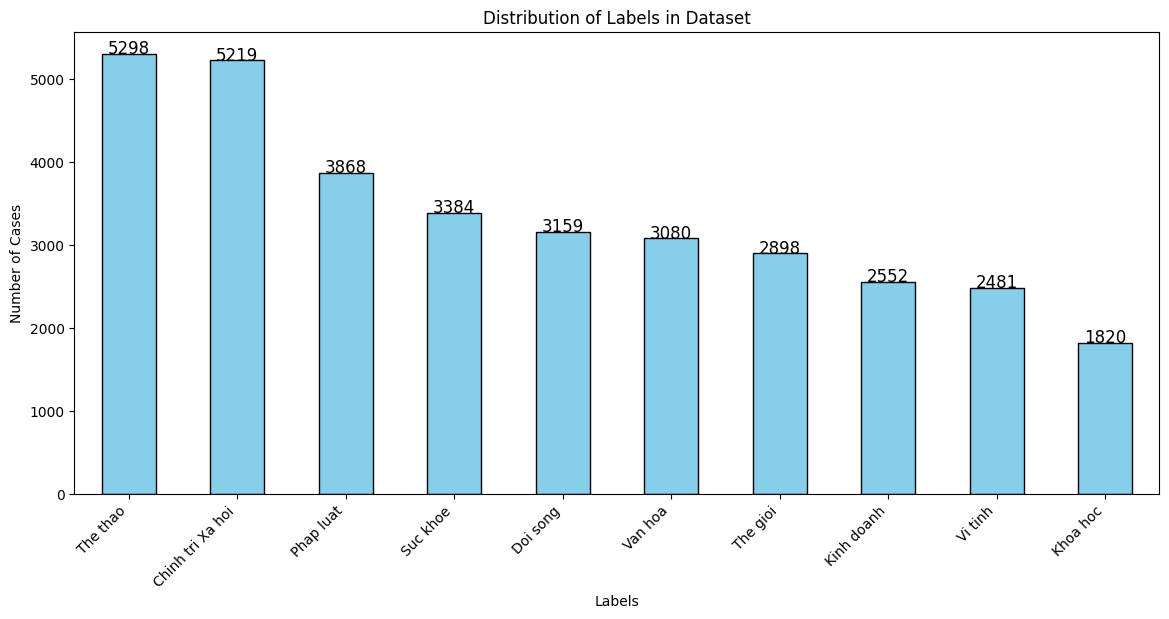

In [ ]:
label_counts = df["label"].value_counts()

plt.figure(figsize=(14, 6))  

label_counts.plot(kind="bar", color="skyblue", edgecolor="black")

for index, value in enumerate(label_counts):
    plt.text(index, value + 0.1, str(value), ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right")  
plt.ylabel("Number of Cases")
plt.xlabel("Labels")
plt.title("Distribution of Labels in Dataset")

plt.show()


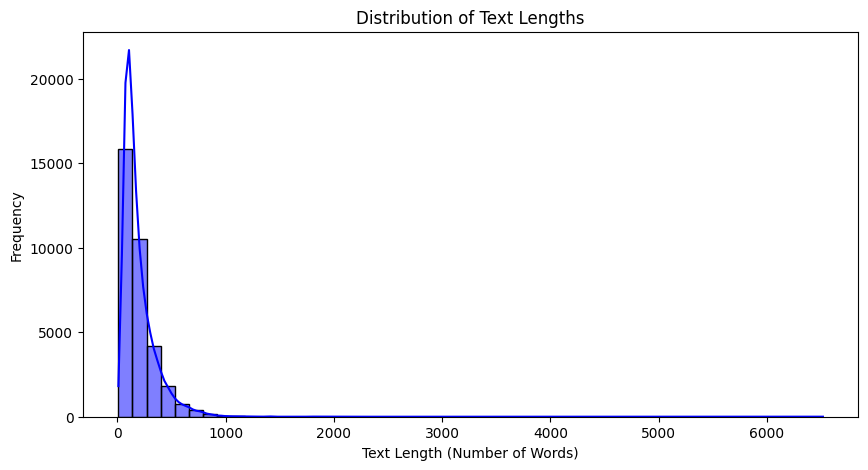

In [29]:
df["text_length"] = df["text"].apply(lambda x: len(x.split()))  

plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=50, kde=True, color="blue")

plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.savefig("plot/text_length_distribution.png")
plt.show()

In [ ]:
with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as f:
    vietnamese_stopwords = set(f.read().splitlines())

def preprocess_vietnamese_text(text):
    text = text.lower()  
    text = re.sub(r"\W+", " ", text)  
    text = ViTokenizer.tokenize(text)  
    text = text.replace("_", " ")  
    words = text.split()
    return " ".join([word for word in words if word not in vietnamese_stopwords])

df["clean_text"] = df["text"].apply(preprocess_vietnamese_text)
df[df["clean_text"].str.contains("_", na=False)]

,text,label,clean_text


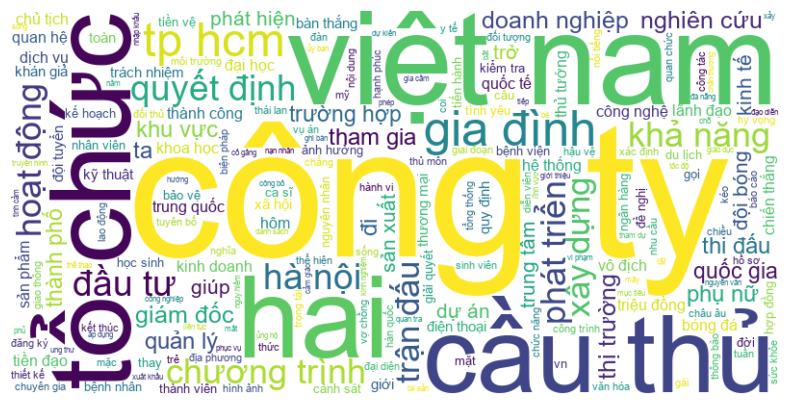

In [ ]:
text_data = " ".join(df["clean_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      font_path="arial.ttf").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

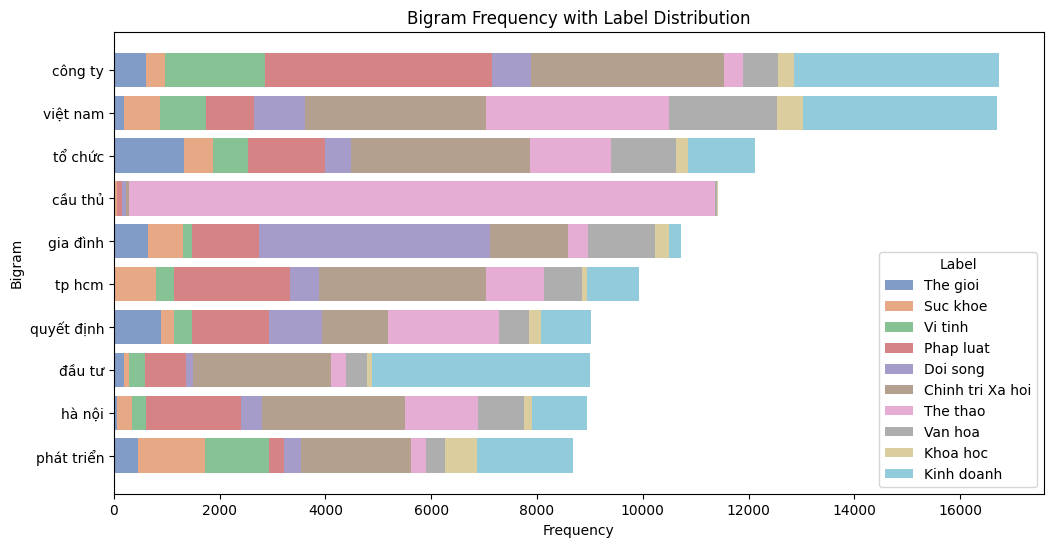

In [ ]:
bigram_counts = {}
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['clean_text'])
    bigrams = Counter(ngrams(text.split(), 2))
    bigram_counts[label] = bigrams

all_bigrams = Counter()
for label in bigram_counts:
    all_bigrams.update(bigram_counts[label])

top_bigrams = [bigram for bigram, _ in all_bigrams.most_common(10)]

bigram_labels = [" ".join(bigram) for bigram in top_bigrams]
label_frequencies = {label: [bigram_counts[label][bigram] for bigram in top_bigrams] for label in df['label'].unique()}

sns.set_palette("deep")

plt.figure(figsize=(12, 6))
bottom = [0] * len(top_bigrams)
for label, counts in label_frequencies.items():
    plt.barh(bigram_labels, counts, left=bottom, label=label, alpha=0.7)
    bottom = [b + c for b, c in zip(bottom, counts)]

plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.title("Bigram Frequency with Label Distribution")
plt.legend(title="Label")
plt.gca().invert_yaxis()
plt.show()